### Get predictions

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import requests


In [ ]:
img_path = ""
im = cv2.imread(img_path)
inp = im[:, :256] / 255.

In [ ]:
url = "https://daylight-server-182483330095.europe-north2.run.app/daylight_factor"
k = requests.post(url, json={"content": {"image": inp.tolist()}})
r = k.json()
image = np.array(r["content"][0])
n_image = (image + 1) * 127.5

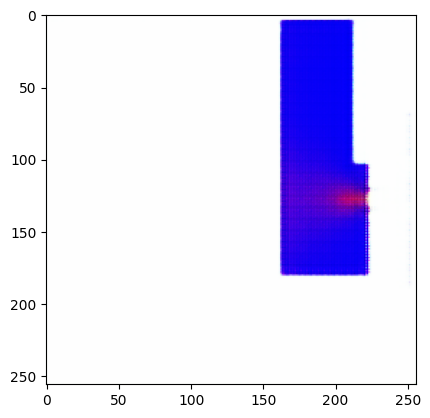

In [ ]:
plt.imshow(image.astype(int))

### Model convert

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model("generator_model.keras")
# m = tf.saved_model.load("saved_model")  ## from .pb

In [ ]:
export_path = 'saved_model'
tf.saved_model.save(model, export_path)

### Generate predictions from a local model

In [ ]:
OUT_DIR = "out"

In [ ]:

def generate_pred(model, test_input, iteration_name):
    """ Generates and saves predictions for test images. """
    save_dir = os.path.join(OUT_DIR, iteration_name, "predictions")
    os.makedirs(save_dir, exist_ok=True)

    predictions = model(test_input, training=False).numpy()

    for i, pred in enumerate(predictions):
        pred = ((pred - pred.min()) / (pred.max() - pred.min())) * 255
        pred = pred.astype(np.uint8)
        img = Image.fromarray(pred)
        img.save(os.path.join(save_dir, f'prediction_{i}.png'))

In [ ]:
generate_pred(model, tf.reshape(im, (-1, 256, 256, 3)), "test")

### Extra

[Reason](https://issuetracker.google.com/issues/123314535?pli=1) for not deploying on VertexAI